# Value at Risk (VaR)

Value at risk (VaR) is a measure of the risk of loss of investment/capital. It estimates how much a set of investments might lose (with a given probability), given normal market conditions, in a set time period such as a day. VaR is typically used by firms and regulators in the financial industry to gauge the amount of assets needed to cover possible losses.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# Historical Method to calculate VaR 

This method uses historical returns to estimate the potential loss. It involves sorting the historical returns and finding the percentile that corresponds to the desired confidence level.

In [2]:
# Using BTC CryptoCurrency Historical Prices
data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-31") #daily distribution
returns = data['Close'].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


Historical VaR (95% confidence level): -5.01%


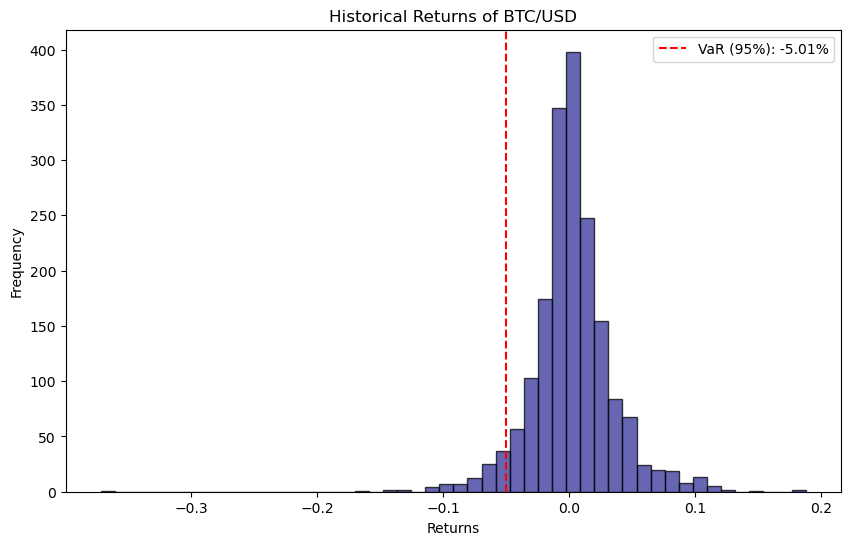

In [3]:
# Calculate the historical VaR at 95% confidence level
confidence_level = 0.95
var_historical = np.percentile(returns, (1 - confidence_level) * 100)

print(f"Historical VaR (95% confidence level): {var_historical:.2%}")

plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, alpha=0.75, color='#333399', edgecolor='black')
plt.axvline(var_historical, color='red', linestyle='--', label=f'VaR (95%): {var_historical:.2%}')
plt.title('Historical Returns of BTC/USD')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In practical terms, this indicates that:
- On **95% of trading days**, the loss has not exceeded **5.01%** in this historical sample (last 4Y).
- Conversely, there is a **5% chance** (based on historical data) that daily returns could be **worse** than **-5.01%**.

# Variance-Covariance Method

This method assumes that asset returns are normally distributed. It uses the mean and standard deviation of the portfolio’s returns to calculate VaR. This method is also known as the parametric method.

In [4]:
# Calculate the mean and standard deviation of returns
mean_return = np.mean(returns)
std_dev = np.std(returns, axis=0)

Variance-Covariance VaR (95% confidence level): -5.32%


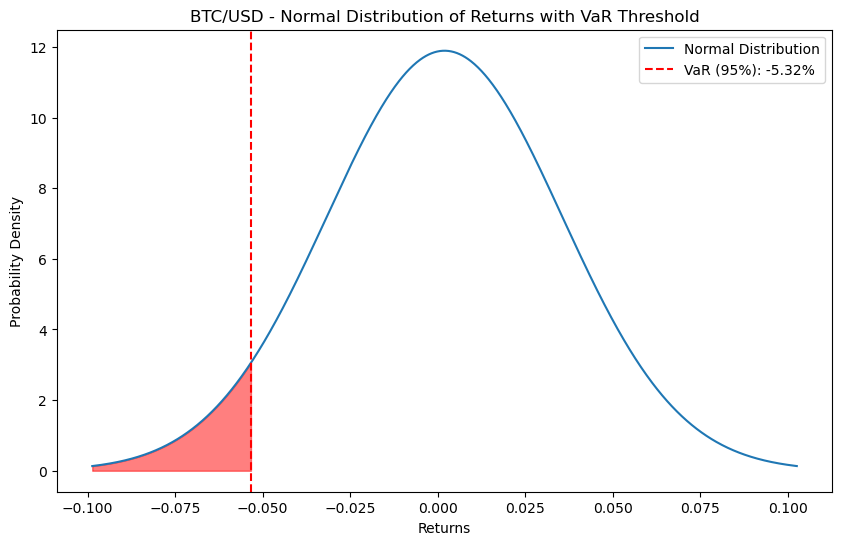

In [5]:
confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)
var_variance_covariance = (mean_return + z_score * std_dev).values[0]

print(f"Variance-Covariance VaR (95% confidence level): {var_variance_covariance:.2%}")

plt.figure(figsize=(10, 6))
x = np.linspace(mean_return - 3*std_dev, mean_return + 3*std_dev, 1000).flatten()
y = norm.pdf(x, mean_return, std_dev).flatten()

plt.plot(x, y, label='Normal Distribution')
plt.axvline(var_variance_covariance, color='red', linestyle='--', label=f'VaR (95%): {var_variance_covariance:.2%}')
plt.fill_between(x, 0, y, where=(x <= var_variance_covariance), color='red', alpha=0.5)
plt.title('BTC/USD - Normal Distribution of Returns with VaR Threshold')
plt.xlabel('Returns')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Monte Carlo Simulation 

This method uses random sampling to simulate a range of potential outcomes based on historical data. It is computationally intensive but flexible in modeling complex portfolios.

In [6]:
num_simulations = 10000
simulation_horizon = 365  # Number of days in a year, without leap year
simulated_returns = np.random.normal(mean_return, std_dev, (simulation_horizon, num_simulations))

# Calculate the simulated portfolio values
initial_investment = 100000 # $100k
portfolio_values = initial_investment * np.exp(np.cumsum(simulated_returns, axis=0))

# Calculate the portfolio returns
portfolio_returns = portfolio_values[-1] / portfolio_values[0] - 1

Monte Carlo VaR (95% confidence level): -26.79%


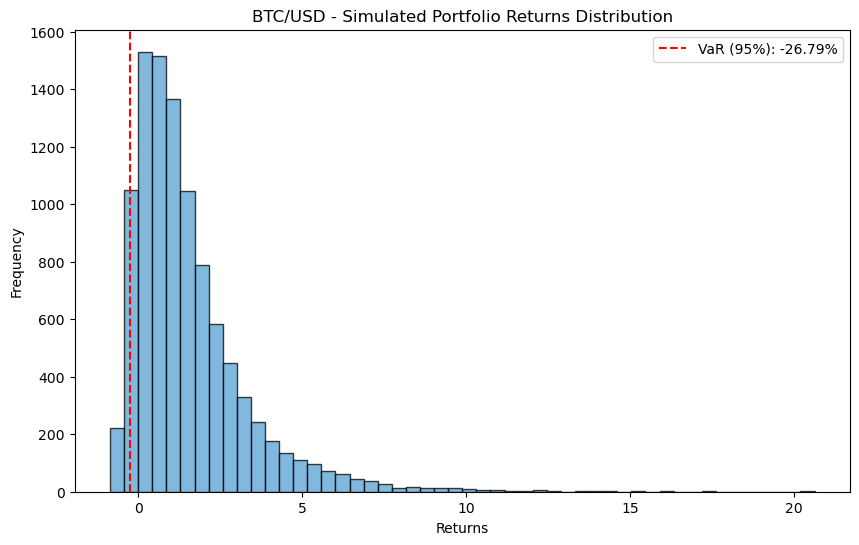

In [7]:
# Calculate the VaR at 95% confidence level
confidence_level = 0.95
var_monte_carlo = np.percentile(portfolio_returns, (1 - confidence_level) * 100)

print(f"Monte Carlo VaR (95% confidence level): {var_monte_carlo:.2%}")

# Plot the distribution of simulated portfolio returns and VaR threshold
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, alpha=0.75, color='#57A0D2', edgecolor='black')
plt.axvline(var_monte_carlo, color='red', linestyle='--', label=f'VaR (95%): {var_monte_carlo:.2%}')
plt.title('BTC/USD - Simulated Portfolio Returns Distribution')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()